In [1]:
import numpy as np
import pandas as pd

from scipy import stats

In [2]:
from cprior.models import NormalModel
from cprior.models import NormalMVTest
from cprior.experiment.base import Experiment

In [3]:
modelA = NormalModel(name="control")
modelB = NormalModel(name="variation")
modelC = NormalModel(name="variation")
modelD = NormalModel(name="variation")

mvtest = NormalMVTest({"A": modelA, "B": modelB, "C": modelC, "D": modelD})

In [4]:
experiment = Experiment(name="GPA", test=mvtest, stopping_rule="probability_vs_all",
                        epsilon=0.99, min_n_samples=500, max_n_samples=None,
                        nig_metric="mu")

Describe

In [5]:
experiment.describe()

  Experiment: GPA
    Bayesian model:     normal-normalinversegamma
    Number of variants:                         4

    Options:
      stopping rule            probability_vs_all
      epsilon                             0.99000
      min_n_samples                           500
      max_n_samples                       not set

    Priors:

           loc  variance_scale  shape  scale
      A  0.001           0.001  0.001  0.001
      B  0.001           0.001  0.001  0.001
      C  0.001           0.001  0.001  0.001
      D  0.001           0.001  0.001  0.001
  -------------------------------------------------



Generate new data and update models

In [6]:
with experiment as e:
    while not e.termination:
        data_A = stats.norm(loc=8, scale=3).rvs(size=10)
        data_B = stats.norm(loc=7, scale=2).rvs(size=25)
        data_C = stats.norm(loc=7.5, scale=4).rvs(size=12)
        data_D = stats.norm(loc=6.75, scale=2).rvs(size=8)

        e.run_update(**{"A": data_A, "B": data_B, "C": data_C, "D": data_D})
        
    print(e.termination, e.status)

True winner A


Plotting

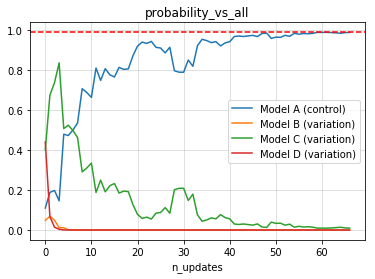

In [7]:
experiment.plot_metric()

Summary

In [8]:
experiment.summary()

,name,probability,expected_loss,improvement,probability_vs_all,expected_loss_vs_all,improvement_vs_all,n_samples
A,control,-,-,-,99.06%,0.000570438,5.21%,670
B,variation,0.00%,1.04804,-14.99%,0.00%,1.04861,-15.00%,1675
C,variation,0.94%,0.421278,-5.55%,0.94%,0.421282,-5.55%,804
D,variation,0.00%,1.32132,-19.68%,0.00%,1.32189,-19.69%,536


Statistics

In [9]:
experiment.stats()

,A,B,C,D
count,670.000000,1675.000000,804.000000,536.000000
mean,8.040951,6.992907,7.620237,6.719632
std,3.117976,2.026944,3.757308,2.053000
min,-4.332434,0.849091,-6.100430,1.158895
25%,5.901997,5.615989,4.939796,5.306747
50%,8.224874,7.000855,7.608970,6.740613
75%,10.038209,8.313586,10.379580,8.328947
max,16.434707,13.962327,21.588926,12.728282


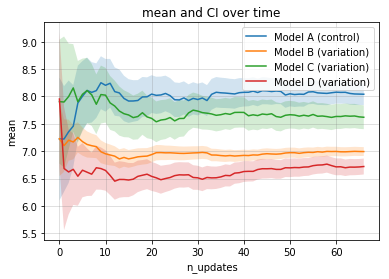

In [10]:
experiment.plot_stats()